In [34]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
import netCDF4 as nc
import os
import copy
import matplotlib.colors as mcolors
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cftime
# import xesmf as xe
import matplotlib.pyplot as plt
from lib import driver
# from lib import plot 
from lib.tools import get_categorical_obs, get_categorical_fcst, get_heidke, get_rpss
# from lib import verif
from lib.tools import *
import pandas as pd

In [2]:
def check_lat_order(dataset,verbose=False):
    """
    Check the order of latitude coordinates in the dataset.
    
    Parameters:
    - dataset: xarray.Dataset or xarray.DataArray
    
    Returns:
    - True if latitude is ordered from North to South (N to S).
    - False if latitude is ordered from South to North (S to N).
    - None if the order is ambiguous or the dataset is empty.
    """
    if 'latitude' in dataset.coords:
        dataset = dataset.rename_dims({'latitude': 'lat', 'longitude': 'lon'})

    lat_coords = dataset['lat']
    lat_diff = lat_coords.diff(dim='lat')
    if verbose:
        print(lat_diff)

    if (lat_diff < 0.).all():
        dataset= dataset.sel(lat=dataset.lat[::-1])
        print('change latitude from S to N')
        # print(dataset.lat)
    elif (lat_diff > 0.).all():
        dataset = dataset
        print('====latitude from S to N----')
        # print(dataset.lat)
    else:
        print('!!!!!! Latitude ambiguous or unordered !!!!!!')
    return(dataset)


In [75]:
ds = xr.open_dataset('/home/ycheng/LIM/Scoring_John_code/cpc_data/cpc_anom_2019.nc')
ds = check_lat_order(ds)
ds
anom = ds['cpc_anom']

====latitude from S to N----


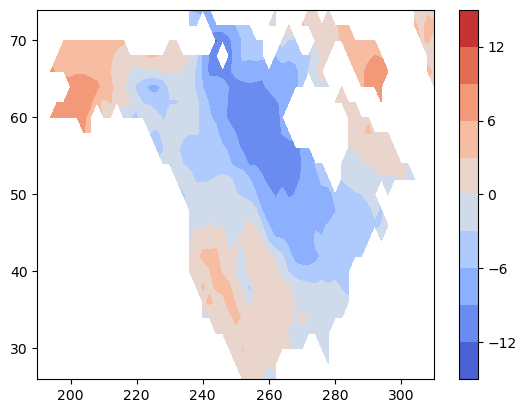

In [80]:
# climatology.tavg.isel(dayofyear=0).plot()
subset_data = ds.cpc_anom[30].sel(lat=slice(25, 75), lon=slice(190, 310))
contour_levels = np.linspace(-15, 15, 11)  # Adjust the number of levels as needed
plt.contourf(subset_data['lon'], subset_data['lat'], subset_data, levels=contour_levels, cmap='coolwarm')
plt.colorbar()

In [74]:
dsJ

<xarray.Dataset>
Dimensions:          (lat: 91, lon: 180, time: 151)
Coordinates:
  * lat              (lat) float64 -90.0 -88.0 -86.0 -84.0 ... 86.0 88.0 90.0
  * lon              (lon) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time             (time) float64 7.374e+05 7.374e+05 ... 7.376e+05 7.376e+05
Data variables:
    cpc_anom_week34  (time, lat, lon) float64 ...
    lim              (time, lat, lon) float64 ...
    hss              (time) float64 ...
    climo            (time, lat, lon) float64 ...

====latitude from S to N----


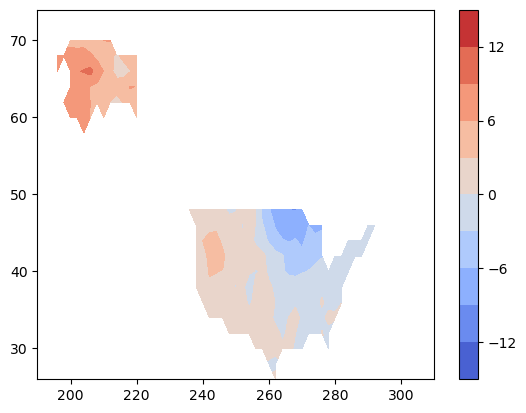

In [82]:
dsJ = xr.open_dataset('/home/ycheng/LIM/Scoring_John_code/2019.nc')
dsJ = check_lat_order(dsJ,verbose=False)

subset_data_J = dsJ.cpc_anom_week34[0].sel(lat=slice(25, 75), lon=slice(190, 310))
# contour_levels = np.linspace(250, 300, 11)  # Adjust the number of levels as needed
plt.contourf(subset_data_J['lon'], subset_data_J['lat'], subset_data_J, levels=contour_levels, cmap='coolwarm')
plt.colorbar()

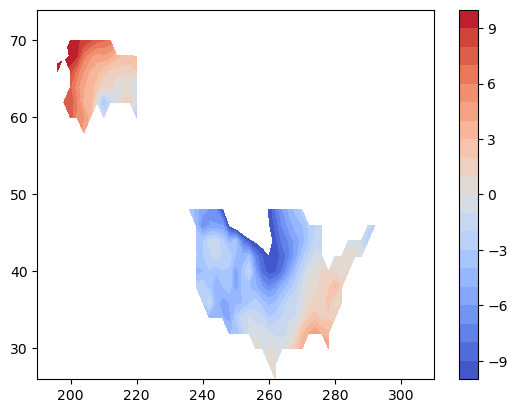

In [89]:
subset_data_J = dsJ.cpc_anom_week34[30].sel(lat=slice(25, 75), lon=slice(190, 310))

lt = (21,28)
lt = (18,25)
# lt = (19,26)
# lt = (17,24)
T_INIT = dt(2019,1,30) #dt(YEAR,MONTH,1)


anom_obs = xr.concat([anom.sel(time=T_INIT+timedelta(days=l)) for l in lt],dim='time').mean(dim='time')
subset_data_anom = anom_obs.sel(lat=slice(25, 75), lon=slice(190, 310))
subset_data_anom = xr.where(subset_data_J.isnull(),np.nan,subset_data_anom)

contour_levels = np.linspace(-10, 10, 21)  # Adjust the number of levels as needed
plt.contourf(subset_data_anom['lon'], subset_data_anom['lat'], subset_data_anom, levels=contour_levels, cmap='coolwarm')
plt.colorbar()

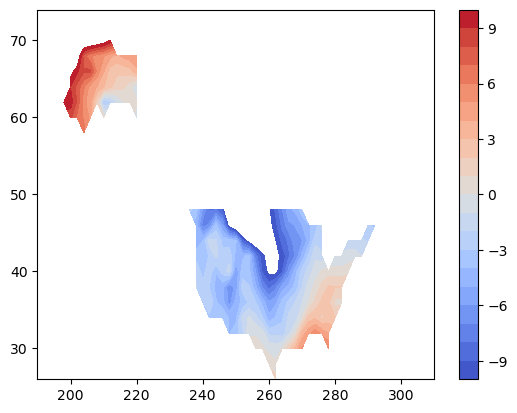

In [90]:
subset_data_anom_J = dsJ.cpc_anom_week34[30].sel(lat=slice(25, 75), lon=slice(190, 310))
plt.contourf(subset_data_anom_J['lon'], subset_data_anom_J['lat'], subset_data_anom_J, levels=contour_levels, cmap='coolwarm')
plt.colorbar()